#### Loading the dataset

In [34]:
import pandas as pd

df = pd.read_csv("YoutubeCommentsDataset.csv")

df["Sentiment"] = df["Sentiment"].str.lower()

df.to_csv("YoutubeCommentsDataSet.csv", index=False)

print("✅ Sentiment labels normalized to lowercase!")

print("Dataset Information:")
print(df.info())

print("\nSample Data:")
print(df.head())


✅ Sentiment labels normalized to lowercase!
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18428 entries, 0 to 18427
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18384 non-null  object
 1   Sentiment  18428 non-null  object
dtypes: object(2)
memory usage: 288.1+ KB
None

Sample Data:
                                             Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive


In [35]:
print(df["Comment"].str.contains("#").sum())  # Count of comments with #

20


#### Check for missing values

In [36]:
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

df = df.dropna(subset=["Comment"])


Missing Values in Dataset:
Comment      44
Sentiment     0
dtype: int64


#### Check sentiment distribution


Sentiment Distribution:
Sentiment
positive    11412
neutral      4626
negative     2346
Name: count, dtype: int64


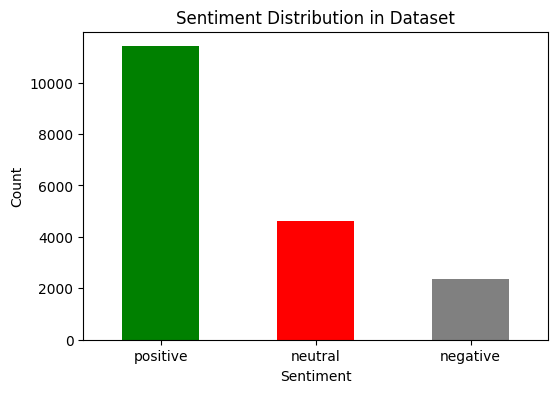

In [37]:
import matplotlib.pyplot as plt

sentiment_counts = df["Sentiment"].value_counts()

print("\nSentiment Distribution:")
print(sentiment_counts)

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Dataset")
plt.xticks(rotation=0)
plt.show()

As the data is imbalanced, we will handle the imbalanced data. Oversampling the minority class (neutral, negative). Undersampling the majority class (positive)

In [38]:
!pip install imbalanced-learn


Balanced Sentiment Distribution: Counter({'positive': 6000, 'negative': 5000, 'neutral': 5000})


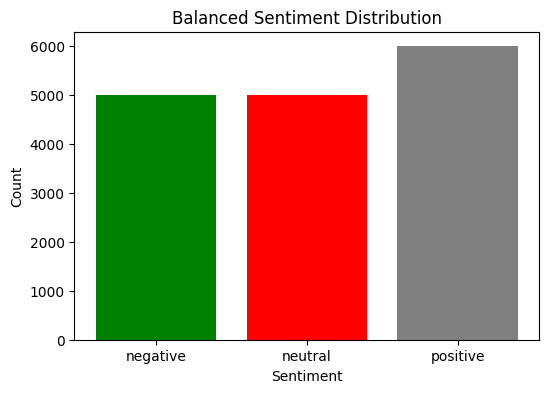

In [39]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = df["Comment"]
y = df["Sentiment"]

oversample = RandomOverSampler(sampling_strategy={"negative": 5000, "neutral": 5000})
X_resampled, y_resampled = oversample.fit_resample(X.values.reshape(-1, 1), y)

undersample = RandomUnderSampler(sampling_strategy={"positive": 6000})
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)

balanced_df = pd.DataFrame({"Comment": X_resampled.flatten(), "Sentiment": y_resampled})

new_counts = Counter(balanced_df["Sentiment"])
print("\nBalanced Sentiment Distribution:", new_counts)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(new_counts.keys(), new_counts.values(), color=["green", "red", "gray"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Balanced Sentiment Distribution")
plt.xticks(rotation=0)
plt.show()

#### Text preprocessing

In [40]:
!pip install nltk

In [41]:
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk_data_dir = os.path.join(os.path.expanduser("~"), "nltk_data")
nltk.data.path.append(nltk_data_dir)

lemmatizer = WordNetLemmatizer()

try:
    test_lemma = lemmatizer.lemmatize('testing')
    print(f"Lemmatizer test: 'testing' → '{test_lemma}'")
except Exception as e:
    print(f"Lemmatizer test failed: {str(e)}")
    print("Using a simplified preprocessing function without lemmatization")
    def preprocess_text(text):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        words = word_tokenize(text)
        words = [word for word in words if word not in stopwords.words('english')]
        return " ".join(words)
else:
    def preprocess_text(text):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        words = word_tokenize(text)
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        return " ".join(words)

balanced_df["Processed_Comment"] = balanced_df["Comment"].apply(preprocess_text)

print(balanced_df[["Comment", "Processed_Comment"]].head())

Lemmatizer test: 'testing' → 'testing'
                                             Comment  \
0  here in nz 50 of retailers don’t even have con...   
1  whenever i go to a place that doesn’t take app...   
2  holy crap i was looking at chroma systems back...   
3  how does every person wired brings on this sho...   
4  his face when describing hops killed me “some ...   

                                   Processed_Comment  
0  nz retailer dont even contactless credit card ...  
1  whenever go place doesnt take apple pay doesnt...  
2  holy crap looking chroma system back designing...  
3  every person wired brings show act like theyve...  
4       face describing hop killed smell pretty dank  


#### Convert text to features using TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

X_tfidf = tfidf.fit_transform(balanced_df["Processed_Comment"])

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print(tfidf_df.head())
joblib.dump(tfidf, "tfidf.pkl")

   aaa  aap  aaron  abandon  abandoned  aber  abi  abian  ability  able  ...  \
0  0.0  0.0    0.0      0.0        0.0   0.0  0.0    0.0      0.0   0.0  ...   
1  0.0  0.0    0.0      0.0        0.0   0.0  0.0    0.0      0.0   0.0  ...   
2  0.0  0.0    0.0      0.0        0.0   0.0  0.0    0.0      0.0   0.0  ...   
3  0.0  0.0    0.0      0.0        0.0   0.0  0.0    0.0      0.0   0.0  ...   
4  0.0  0.0    0.0      0.0        0.0   0.0  0.0    0.0      0.0   0.0  ...   

   yummy  zach  zebra  zero  zifn  zombie  zone  zoom  zuerst  zusammen  
0    0.0   0.0    0.0   0.0   0.0     0.0   0.0   0.0     0.0       0.0  
1    0.0   0.0    0.0   0.0   0.0     0.0   0.0   0.0     0.0       0.0  
2    0.0   0.0    0.0   0.0   0.0     0.0   0.0   0.0     0.0       0.0  
3    0.0   0.0    0.0   0.0   0.0     0.0   0.0   0.0     0.0       0.0  
4    0.0   0.0    0.0   0.0   0.0     0.0   0.0   0.0     0.0       0.0  

[5 rows x 5000 columns]


['tfidf.pkl']

#### Training different models for sentiment classification

In [43]:
!pip install scikit-learn xgboost

Logistic Regression Accuracy: 0.7597
Random Forest Accuracy: 0.7984
SVM Accuracy: 0.8125
Naïve Bayes Accuracy: 0.6750
XGBoost Accuracy: 0.7441


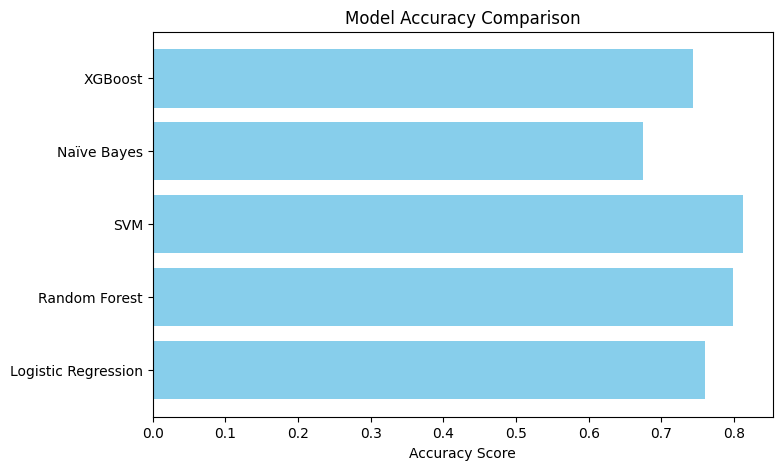

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Extract features (TF-IDF) and target variable (Sentiment)
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
balanced_df["Sentiment"] = balanced_df["Sentiment"].map(label_mapping)
X = X_tfidf
y = balanced_df["Sentiment"]

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naïve Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Display accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color='skyblue')
plt.xlabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()

In [45]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts labels into 0, 1, 2

print("Original Labels:", np.unique(y))  
print("Encoded Labels:", np.unique(y_encoded))


Original Labels: [0 1 2]
Encoded Labels: [0 1 2]


In [46]:
import warnings
warnings.filterwarnings("ignore", message="Clustering metrics expects discrete values")



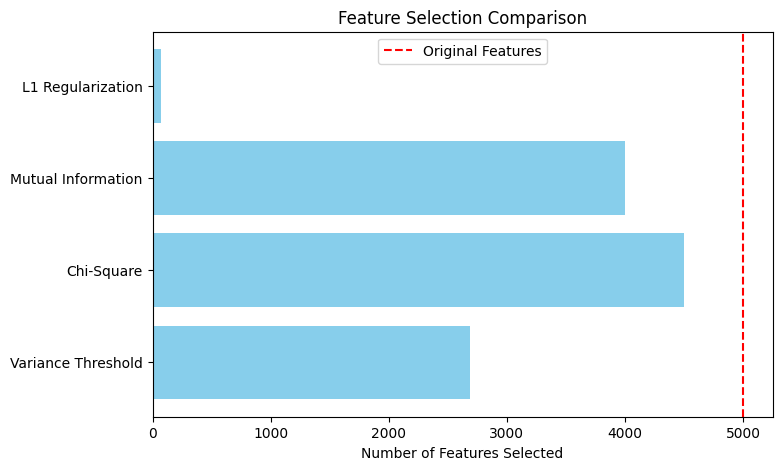

Original feature count: 5000
Variance Threshold: 2690 features selected
Chi-Square: 4500 features selected
Mutual Information: 4000 features selected
L1 Regularization: 68 features selected


In [47]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Store results
feature_counts = {}

# Original number of features
original_feature_count = X_tfidf.shape[1]

### 1️⃣ Variance Threshold (Remove low-variance features)
selector_variance = VarianceThreshold(threshold=0.0001)  # Remove words that appear in almost all comments
X_variance = selector_variance.fit_transform(X_tfidf)
feature_counts["Variance Threshold"] = X_variance.shape[1]

### 2️⃣ Chi-Square Test (Select 80% best features)
selector_chi2 = SelectKBest(chi2, k=int(0.9 * original_feature_count))
X_chi2 = selector_chi2.fit_transform(X_tfidf, y)
feature_counts["Chi-Square"] = X_chi2.shape[1]

### 3️⃣ Mutual Information (Select 80% most informative features)
selector_mi = SelectKBest(mutual_info_classif, k=int(0.8 * original_feature_count))
X_mi = selector_mi.fit_transform(X_tfidf, y)
feature_counts["Mutual Information"] = X_mi.shape[1]

### 4️⃣ L1 Regularization (Lasso-based feature selection)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)  # L1 Regularization
log_reg_l1.fit(X_tfidf, y)
mask_l1 = log_reg_l1.coef_.sum(axis=0) != 0  # Features with non-zero weights
X_l1 = X_tfidf[:, mask_l1]
feature_counts["L1 Regularization"] = X_l1.shape[1]

### **Plot Feature Selection Results**
plt.figure(figsize=(8, 5))
plt.barh(list(feature_counts.keys()), list(feature_counts.values()), color='skyblue')
plt.axvline(x=original_feature_count, color='red', linestyle='dashed', label='Original Features')
plt.xlabel("Number of Features Selected")
plt.title("Feature Selection Comparison")
plt.legend()
plt.show()

# Print results
print("Original feature count:", original_feature_count)
for method, count in feature_counts.items():
    print(f"{method}: {count} features selected")


In [48]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Suppress XGBoost warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define model classes (not instances)
model_classes = {
    "Logistic Regression": LogisticRegression,
    "SVM": SVC,
    "Random Forest": RandomForestClassifier,
    "Naïve Bayes": MultinomialNB,
    "XGBoost": XGBClassifier
}

# Feature sets
feature_sets = {
    "Original Features": X_tfidf,
    "Variance Threshold": X_variance,
    "Chi-Square": X_chi2,
    "Mutual Information": X_mi,
    "L1 Regularization": X_l1
}

# Store results
results = {}

for feature_name, X_features in feature_sets.items():
    print(f"Training models using {feature_name}...")
    
    # Ensure consistent train-test split
    X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
        X_features, y, test_size=0.2, random_state=42, stratify=y
    )
    
    model_accuracies = {}
    
    for model_name, ModelClass in model_classes.items():
        # Avoid Naïve Bayes issues with negative values
        if model_name == "Naïve Bayes" and np.any(X_train_fs < 0):
            print(f"Skipping {model_name} for {feature_name} (negative values detected)")
            continue
        
        # Instantiate a fresh model for each iteration
        model = ModelClass(max_iter=1000) if model_name == "Logistic Regression" else ModelClass()
        if model_name == "XGBoost":
            model = ModelClass(use_label_encoder=False, eval_metric='mlogloss')
        
        # Train and evaluate the model
        model.fit(X_train_fs, y_train_fs)
        y_pred = model.predict(X_test_fs)
        accuracy = accuracy_score(y_test_fs, y_pred)
        model_accuracies[model_name] = accuracy
    
    results[feature_name] = model_accuracies

# Print results
for feature_name, model_accuracies in results.items():
    print(f"\nFeature Selection: {feature_name}")
    for model_name, accuracy in model_accuracies.items():
        print(f"{model_name}: {accuracy:.4f}")


Training models using Original Features...


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define parameter grids for each model
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

# Initialize models
svm_model = SVC()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Perform Grid Search
svm_grid = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the models
print("Tuning SVM...")
svm_grid.fit(X_train, y_train)
print("Best SVM Parameters:", svm_grid.best_params_)

print("Tuning Random Forest...")
rf_grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)

print("Tuning XGBoost...")
xgb_grid.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_grid.best_params_)

# Evaluate the best models
best_svm = svm_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

svm_acc = best_svm.score(X_test, y_test)
rf_acc = best_rf.score(X_test, y_test)
xgb_acc = best_xgb.score(X_test, y_test)

print("Tuned SVM Accuracy:", svm_acc)
print("Tuned Random Forest Accuracy:", rf_acc)
print("Tuned XGBoost Accuracy:", xgb_acc)


Negative : 0                   Neutral:1                 Positive:2

In [ ]:
!pip install spacy --user

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

nlp = spacy.load("en_core_web_sm")

def extract_nouns_adjectives(text):
    doc = nlp(text)  # Process text with spaCy
    meaningful_words = [token.text for token in doc if token.pos_ in {"NOUN", "ADJ"}]
    return meaningful_words


all_words = []
for comment in balanced_df["Processed_Comment"]:
    all_words.extend(extract_nouns_adjectives(comment))

custom_stopwords = {"like", "really", "would", "one", "im", "dont", "much", "even"}
filtered_words = [word for word in all_words if word.lower() not in custom_stopwords]

word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(20)

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(frequencies), palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Used Nouns & Adjectives in YouTube Comments")
plt.show()


In [ ]:
print(balanced_df["Comment"].str.contains("#").sum())  # Count of comments with #


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def extract_hashtags(text):
    return re.findall(r"#\w+", str(text))  # Finds words starting with #

all_hashtags = []
for comment in df["Comment"].dropna():  # Drop NaN values to avoid errors
    all_hashtags.extend(extract_hashtags(comment))

hashtag_counts = Counter(all_hashtags)

most_common_hashtags = hashtag_counts.most_common(15)

hashtags, counts = zip(*most_common_hashtags)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(hashtags), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.title("Top Trending Hashtags in YouTube Comments")
plt.show()
